# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.185055e+01     7.338664e+00
 * time: 0.004106044769287109
     1     2.802811e+01     5.305935e+00
 * time: 0.012513160705566406
     2     2.578652e+01     9.741453e+00
 * time: 0.032627105712890625
     3     1.553205e+01     4.157661e+00
 * time: 0.05649614334106445
     4     1.294428e+01     2.284744e+00
 * time: 0.07524394989013672
     5     1.159086e+01     2.034349e+00
 * time: 0.0899651050567627
     6     1.068732e+01     1.281721e+00
 * time: 0.10490918159484863
     7     1.038645e+01     1.148307e+00
 * time: 0.11993908882141113
     8     9.915333e+00     8.544277e-01
 * time: 0.1346580982208252
     9     9.663420e+00     5.441031e-01
 * time: 0.1491870880126953
    10     9.539808e+00     5.570464e-01
 * time: 0.16382503509521484
    11     9.479001e+00     3.601512e-01
 * time: 0.17864513397216797
    12     9.477581e+00     5.942095e-01
 * time: 0.18975114822387695
    13     9.442792e+00     4.434931e-01
 * time:

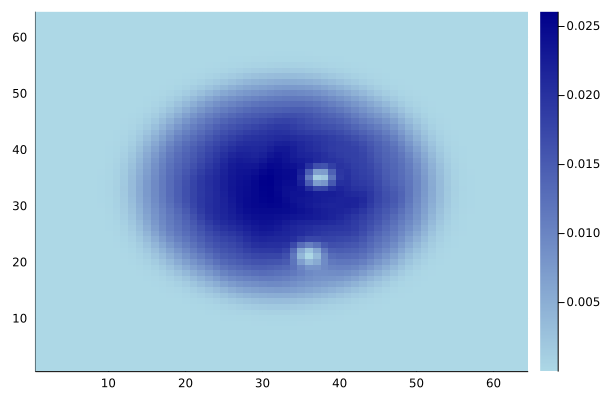

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)